In [1]:
import torch
import numpy as np
from transforms import get_O
from transforms import t_get_O

In [11]:
import torch
import numpy as np
from lattice import Lattice
torch.set_default_dtype(torch.float64)
latt = Lattice([4,4,4],[16,16,16])
O = latt.ort_mat
K = latt.kin_mat
diag = torch.einsum("ji,jk,ks->is",O,K,O)


d = torch.diag(latt.get_diag_kin_mat())
delta = (d-diag).flatten()
print(torch.norm(delta))

tensor(3.4132e-13)


In [22]:
delta = torch.einsum("ji,ki->jk",O,O)-torch.eye(latt.total_nodes)
delta = delta.flatten()
print(torch.norm(delta))

tensor(2.7027e-15)


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from systems.Fields.scalar_field import Scalar_Field
torch.set_default_dtype(torch.float64)

L = 8
mass2 = 128
latt = Lattice([8,L],[16,4])
sf = Scalar_Field(latt,mass2)
prop = sf.get_free_prop_x()

id = torch.eye(latt.total_nodes)
delta1 = torch.matmul(latt.kin_mat + mass2 * id , prop ) - id
print(torch.norm(delta1.flatten()))


tensor(4.2838e-15)


In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from systems.Fields.scalar_field import Scalar_Field
torch.set_default_dtype(torch.float64)

latt = Lattice([8,8],[16,4])
o_0 = Lattice.get_ort_mat(latt.n_nodes[0])
o_1 = Lattice.get_ort_mat(latt.n_nodes[1])

for i in range(latt.total_nodes):
    for j in range(latt.total_nodes):
        I = latt.index_to_multi(i)
        J = latt.index_to_multi(j)

        delta = latt.ort_mat[i][j] - o_0[I[0]][J[0]] * o_1 [I[1]][J[1]]
        if delta!=0:
            print('error')


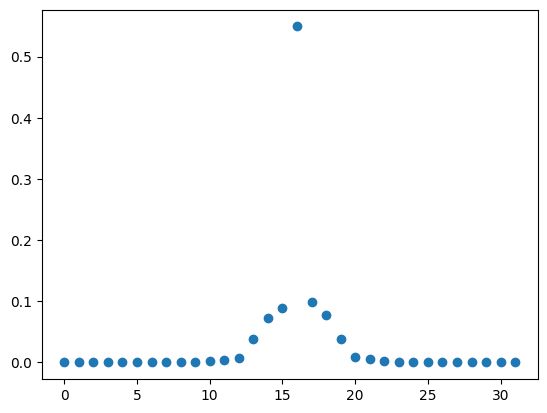

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from systems.Fields.scalar_field import Scalar_Field
torch.set_default_dtype(torch.float64)


L = 32
latt = Lattice([22,L],[16,32])
sf = Scalar_Field(latt,1)
sf.set_J_local(1,[0,L//2])

prop = sf.get_free_prop_x()
phi = torch.matmul(prop,sf.J)

av = sf.lattice.get_time_averaging_mat()
phi = torch.matmul(av,phi)

plt.figure()
plt.scatter(np.arange(sf.lattice.n_nodes[1]),phi)
plt.show()



In [2]:
import torch
import numpy as np
from lattice import Lattice
latt = Lattice([4,4,4],[16,16,16])
norm_dist = torch.distributions.Normal(loc = torch.zeros(latt.total_nodes), scale = torch.ones(latt.total_nodes))
d = torch.diag(latt.get_diag_kin_mat())

In [3]:
tl = latt.get_train_loader(2**18,2**12)
batch = next(iter(tl))
print(batch.device)

cuda:0


In [82]:
from transforms import get_O, t_get_O
o = get_ort_mat(32)
id = torch.einsum("ij,ik->jk",o,o)
print(o.dtype)

torch.float64


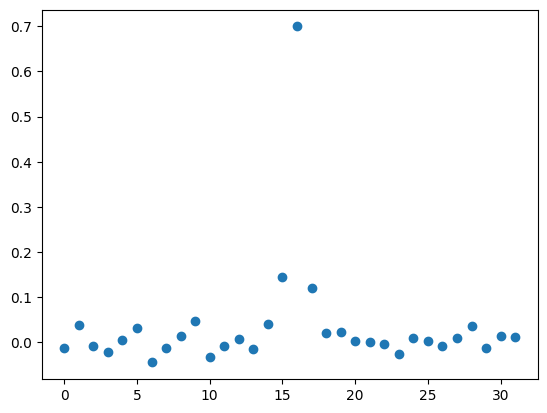

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lattice import Lattice
from systems.Fields.scalar_field import Scalar_Field
from samplers.Metropolis import Metropolis
from samplers.Langevin import Langevin
torch.set_default_dtype(torch.float64)
device="cuda"

L = 32
latt = Lattice([16,L],[16,32],device=device)
sf = Scalar_Field(latt,1)
sf.set_J_local(1,[0,L//2])

normal = latt.normal_sampler()
phi = normal.sample((30,)).to(device)


M = Metropolis(sf,phi.shape[0],0.001, val = lambda x: torch.tensor([1]).to(torch.float32),N_sweep = 1000000,log_per = 10000000,filename = "./trajs_and_corr/1.txt",open_mode = "w")
#M.run(phi)

L = Langevin(sf,phi.shape[0],val = "none",eps = 0.0001,N_sweep = 1000000,log_per = 1000,filename = "./trajs_and_corr/1.txt",open_mode = "w")
L.run(phi)

err = torch.std(phi,0)
phi = torch.mean(phi,0)
av = latt.get_time_averaging_mat()
phi = torch.matmul(sf.lattice.get_time_averaging_mat(),phi)


plt.figure()
plt.scatter(np.arange(sf.lattice.n_nodes[1]),-phi.cpu())
plt.errorbar
plt.show()
